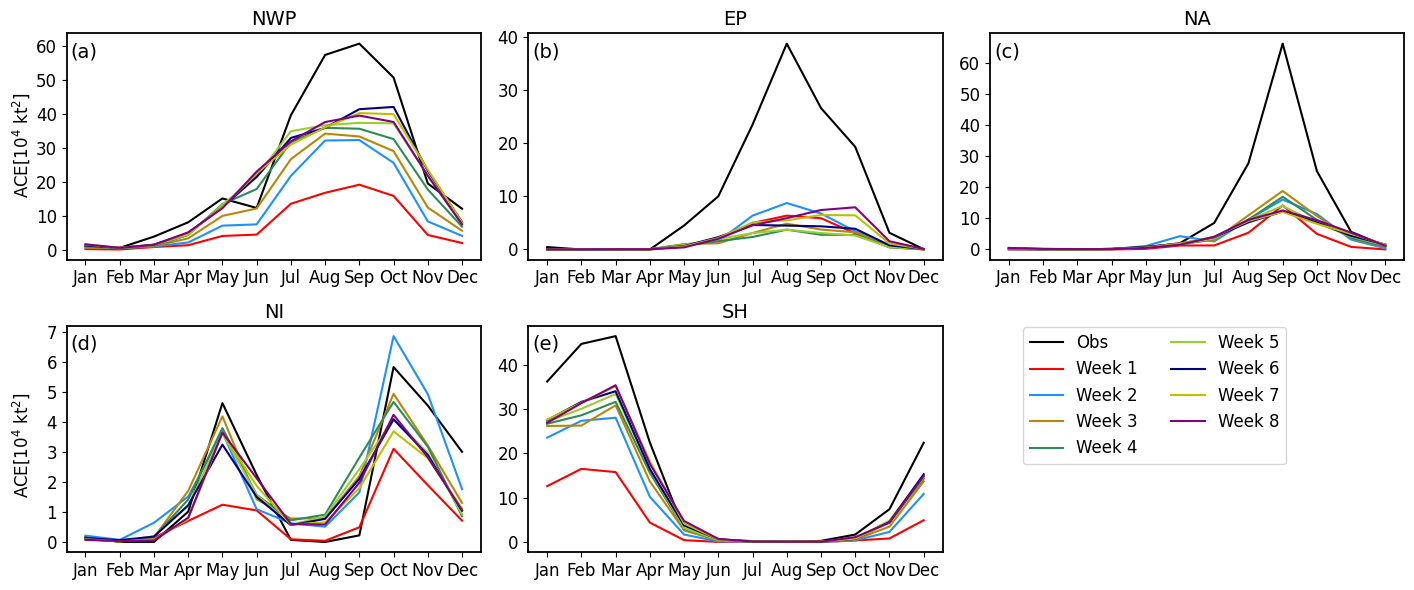

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Data_TC/Proc/Monthly_ACE.csv")
data['month'] = data['month'].fillna('Unknown')

fig, axs = plt.subplots(2, 3, figsize=(14, 6), sharex=False)
columns = ['WP', 'EP', 'NAT', 'NI', 'SH']
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
titles = ['NWP', 'EP', 'NA', 'NI', 'SH']  
colors = ['k', 'red', 'dodgerblue', 'darkgoldenrod', 'seagreen', 'yellowgreen', 'navy', 'y','purple']  

for i, col in enumerate(columns):
    row, col_num = divmod(i, 3)  
    axs[row, col_num].plot(data['month'], data[col], label="Obs", color=colors[0])  
    
    weekly_columns = [f"{col}_week{j}" for j in range(1, 9)]
    for j, week_col in enumerate(weekly_columns, start=1):
        if week_col in data.columns:
            axs[row, col_num].plot(data['month'], data[week_col], label=f"Week {j}", color=colors[j % len(colors)], linestyle='-')  

    axs[row, col_num].text(0.01, 0.96, subplot_labels[i], transform=axs[row, col_num].transAxes, fontsize=14, va='top', ha='left')

    axs[row, col_num].set_title(titles[i], fontsize=14)
    
unique_months = data['month'].unique()[:12] 

for ax in axs.flat:
    ax.set_ylabel("", fontsize=14)  
    ax.set_xticks(range(12))  
    ax.set_xticklabels(unique_months, rotation=0, fontsize=12) 

    for label in ax.get_yticklabels():
        label.set_fontsize(12)  

fig.text(0.00, 0.75, r"ACE[10$^{4}$ kt$^{2}$]", ha='center', va='center', rotation='vertical', fontsize=12)    
fig.text(0.00, 0.25, r"ACE[10$^{4}$ kt$^{2}$]", ha='center', va='center', rotation='vertical', fontsize=12)      

axs[1, 2].axis('off')
handles, labels = axs[0, 0].get_legend_handles_labels()  

unique_legend = dict(zip(labels, handles))
fig.legend(unique_legend.values(), unique_legend.keys(), loc='upper left', bbox_to_anchor=(0.71, 0.46), ncol=2,fontsize=12)

for ax in axs.flat:  
    for _, spine in ax.spines.items():
        spine.set_linewidth(1.3)

plt.tight_layout() 
#plt.savefig('Figures/Supplementary/FigureS3.png', dpi=400, bbox_inches='tight')
plt.show()
